# CIFAR-10 을 이용한 CNN 구축

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12224831745998096290]

In [4]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

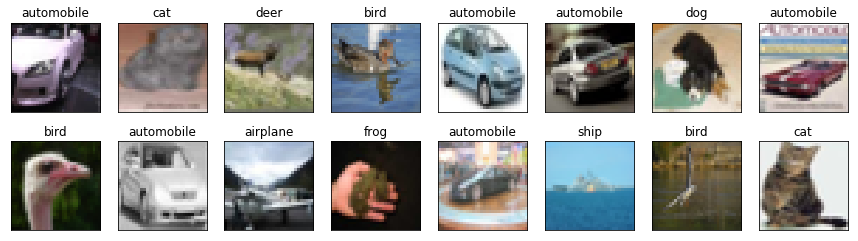

In [7]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

In [8]:
# data normalization
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

In [9]:
# one-hot encoding of class labels
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

In [11]:
# model build
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [13]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [14]:
model.fit(train_ds, epochs=5, validation_data=test_ds, verbose=1, shuffle=True)

Epoch 1/5
782/782 [==============================] - 15s 20ms/step - loss: 1.7169 - accuracy: 0.3652 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 1.4004 - accuracy: 0.4921 - val_loss: 1.1915 - val_accuracy: 0.5771
Epoch 3/5
782/782 [==============================] - 12s 15ms/step - loss: 1.2653 - accuracy: 0.5445 - val_loss: 1.0893 - val_accuracy: 0.6131
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 1.1826 - accuracy: 0.5776 - val_loss: 1.0393 - val_accuracy: 0.6349
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 1.1270 - accuracy: 0.5976 - val_loss: 0.9641 - val_accuracy: 0.6600


In [15]:
model.evaluate(test_ds, verbose=0)

[0.9640566619338503, 0.66]

In [16]:
y_pred = model.predict_classes(X_test_scaled)
print(y_pred.shape)
print(y_pred)

(10000,)
[3 8 8 ... 5 4 7]


In [24]:
y_true = y_test.ravel()
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

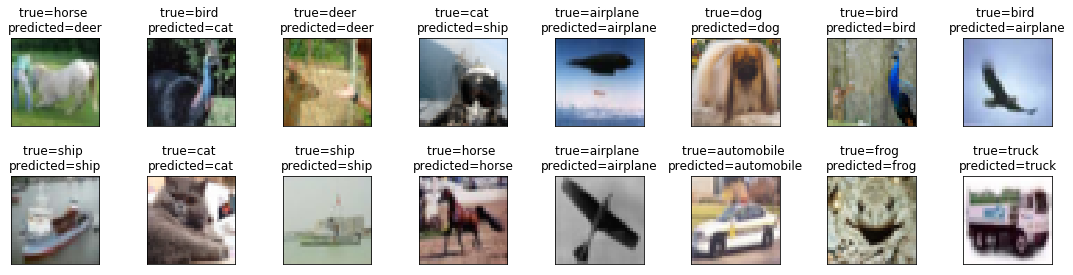

In [25]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_test))
    axes[i].imshow(X_test[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))
plt.tight_layout()

## accuracy 시각화

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

array([[657,  12,  43,  14,  31,   3,  14,  18, 159,  49],
       [ 13, 796,   4,  10,   9,   4,  13,   7,  25, 119],
       [ 82,   4, 439,  52, 202,  70,  92,  33,  17,   9],
       [ 22,  13,  57, 400, 121, 201, 112,  37,  16,  21],
       [ 21,   2,  53,  30, 686,  31,  78,  82,  14,   3],
       [  9,   3,  68, 153,  92, 541,  64,  53,  11,   6],
       [  7,   7,  32,  39,  75,  18, 802,   6,  11,   3],
       [ 17,   2,  24,  32, 120,  69,  15, 704,   4,  13],
       [ 44,  37,  13,  17,  11,   8,   7,   8, 835,  20],
       [ 27, 121,   5,  10,  10,   5,  15,  30,  37, 740]], dtype=int64)

### heatmap 작성

Test Accuracy : 0.66


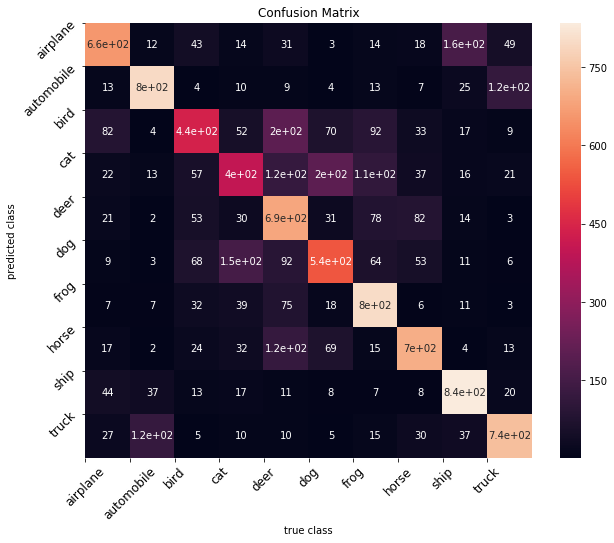

In [30]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True)

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교